In [14]:
import pandas as pd
df = pd.read_csv('netflix_users.csv')
df.head()


,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14


In [15]:
df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User_ID            25000 non-null  int64         
 1   Name               25000 non-null  object        
 2   Age                25000 non-null  int64         
 3   Country            25000 non-null  object        
 4   Subscription_Type  25000 non-null  object        
 5   Watch_Time_Hours   25000 non-null  float64       
 6   Favorite_Genre     25000 non-null  object        
 7   Last_Login         25000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.5+ MB


In [17]:
df.isnull().sum()


,0
User_ID,0
Name,0
Age,0
Country,0
Subscription_Type,0
Watch_Time_Hours,0
Favorite_Genre,0
Last_Login,0


In [18]:
df.describe(include='all')


,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
count,25000.000000,25000,25000.000000,25000,25000,25000.000000,25000,25000
unique,NaN,100,NaN,10,3,NaN,7,NaN
top,NaN,Michael Hernandez,NaN,UK,Premium,NaN,Horror,NaN
freq,NaN,292,NaN,2592,8402,NaN,3654,NaN
mean,12500.500000,NaN,46.482880,NaN,NaN,500.468858,NaN,2024-09-07 03:44:48.768000
min,1.000000,NaN,13.000000,NaN,NaN,0.120000,NaN,2024-03-08 00:00:00
25%,6250.750000,NaN,29.000000,NaN,NaN,256.567500,NaN,2024-06-07 00:00:00
50%,12500.500000,NaN,46.000000,NaN,NaN,501.505000,NaN,2024-09-07 00:00:00
75%,18750.250000,NaN,63.000000,NaN,NaN,745.732500,NaN,2024-12-09 00:00:00
max,25000.000000,NaN,80.000000,NaN,NaN,999.990000,NaN,2025-03-08 00:00:00


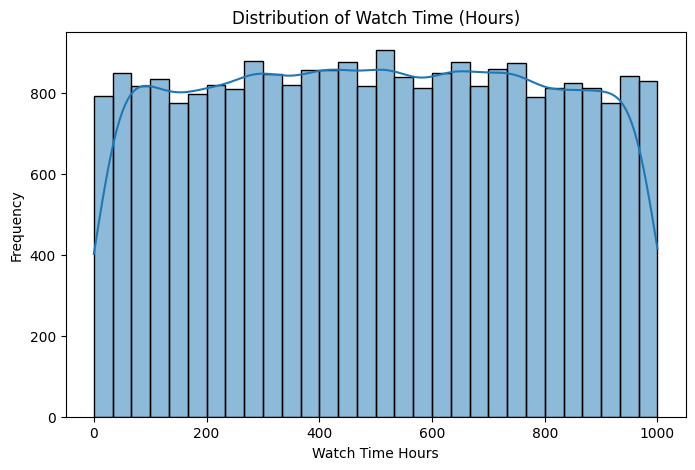

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(df['Watch_Time_Hours'], bins=30, kde=True)
plt.title("Distribution of Watch Time (Hours)")
plt.xlabel("Watch Time Hours")
plt.ylabel("Frequency")
plt.show()

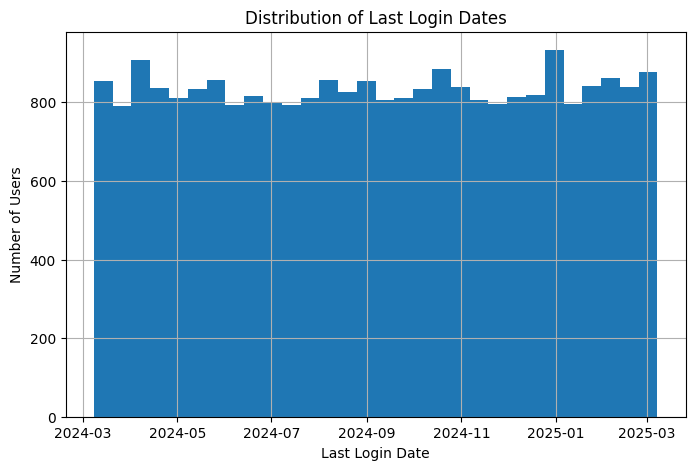

In [20]:
df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')
df['Last_Login'].hist(bins=30, figsize=(8, 5))
plt.title("Distribution of Last Login Dates")
plt.xlabel("Last Login Date")
plt.ylabel("Number of Users")
plt.show()


In [21]:

import numpy as np
from datetime import timedelta
df = pd.read_csv('netflix_users.csv')
df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')
df['Favorite_Genre'] = df['Favorite_Genre'].replace({'SciFi': 'Sci-Fi'})
simulation_start = pd.to_datetime("2024-12-08")
simulation_end = pd.to_datetime("2025-03-08")
date_range = pd.date_range(simulation_start, simulation_end)
np.random.seed(42)
df['Churn_Date'] = pd.NaT
df['Avg_Daily_Watch'] = df['Watch_Time_Hours'] / 90
df['Active'] = True

for idx, row in df.iterrows():
    last_login = row['Last_Login']
    if pd.isna(last_login) or last_login <= simulation_start:
        df.at[idx, 'Active'] = False
        continue
    base_churn_prob = 0.1 if row['Avg_Daily_Watch'] > 1 else 0.15  # Adjusted for target
    valid_days = (last_login - simulation_start).days
    if np.random.random() < base_churn_prob and valid_days >= 1:
        days_to_churn = np.random.randint(1, valid_days + 1)
        churn_date = simulation_start + timedelta(days=days_to_churn)
        if churn_date <= simulation_end:
            df.at[idx, 'Churn_Date'] = churn_date

daily_data = {pd.Timestamp(date): {
    'Total_Watch_Hours': 0, 'Login_Count': 0,
    'Drama_Hours': 0, 'SciFi_Hours': 0, 'Comedy_Hours': 0, 'Action_Hours': 0,
    'Day_of_Week': pd.Timestamp(date).day_name(),
    'Anomaly_Type': 'Normal',
    'Churn_Rate': 0.0
} for date in date_range}

genre_map = {
    'Drama': 'Drama_Hours',
    'Sci-Fi': 'SciFi_Hours',
    'Comedy': 'Comedy_Hours',
    'Action': 'Action_Hours'
}
for _, row in df.iterrows():
    end_date = row['Last_Login']
    churn_date = row['Churn_Date']
    if pd.isna(end_date) or end_date < simulation_start or not row['Active']:
        continue
    start_date = max(end_date - timedelta(days=89), simulation_start)
    days = pd.date_range(start_date, min(end_date, simulation_end))
    if len(days) == 0:
        continue

    base_watch = row['Watch_Time_Hours'] / len(days)
    if row['Subscription_Type'] == 'Premium':
        base_watch *= 1.2
    elif row['Subscription_Type'] == 'Basic':
        base_watch *= 0.8

    genre_col = genre_map.get(row['Favorite_Genre'], None)

    max_logins = len(days)
    n_logins = max_logins if max_logins < 5 else np.random.randint(5, max_logins + 1)
    login_days = np.random.choice(days, n_logins, replace=False)

    for day in days:
        if day not in daily_data:
            continue
        if pd.notnull(churn_date) and day >= churn_date:
            continue
        noise = np.random.normal(0, 0.1 * base_watch)
        final_watch = np.clip(base_watch + noise, 0, 8)
        if day.dayofweek in [5, 6]:
            final_watch *= 1.1
        daily_data[day]['Total_Watch_Hours'] += final_watch
        if genre_col:
            daily_data[day][genre_col] += final_watch
        if day in login_days:
            daily_data[day]['Login_Count'] = int(daily_data[day]['Login_Count'] + 1)

anomaly_days = []
min_spacing = 10
available_days = list(date_range)
while len(anomaly_days) < 5 and available_days:
    day = np.random.choice(available_days)
    anomaly_days.append(pd.Timestamp(day))
    start_idx = max(0, available_days.index(day) - min_spacing)
    end_idx = min(len(available_days), available_days.index(day) + min_spacing + 1)
    available_days = available_days[:start_idx] + available_days[end_idx:]
anomaly_days = sorted(anomaly_days)
anomaly_types = ['Outage', 'Outage', 'Viral_Spike', 'Viral_Spike', 'Jump_Drop']

for day, anomaly_type in zip(anomaly_days, anomaly_types):
    if anomaly_type == 'Jump_Drop':
        jump_multiplier = np.random.choice([0.5, 1.5])
        jump_type = 'Drop_Down' if jump_multiplier == 0.5 else 'Jump_Up'
        daily_data[day]['Total_Watch_Hours'] *= jump_multiplier
        daily_data[day]['Login_Count'] = int(daily_data[day]['Login_Count'] * jump_multiplier)
        daily_data[day]['Anomaly_Type'] = jump_type
        for genre in genre_map.values():
            daily_data[day][genre] *= jump_multiplier
    else:
        multiplier = {'Outage': 0.2, 'Viral_Spike': 2.5}[anomaly_type]
        daily_data[day]['Total_Watch_Hours'] *= multiplier
        daily_data[day]['Login_Count'] = int(daily_data[day]['Login_Count'] * multiplier)
        daily_data[day]['Anomaly_Type'] = anomaly_type
        for genre in genre_map.values():
            daily_data[day][genre] *= multiplier

# 5. Calculate churn rate per day
for date in date_range:
    anomaly_type = daily_data[date]['Anomaly_Type']
    churn_multiplier = {
        'Outage': 1.5,
        'Viral_Spike': 0.8,
        'Jump_Up': 1.2,
        'Drop_Down': 1.3,
        'Normal': 1.0
    }.get(anomaly_type, 1.0)
    active_users = df[(df['Last_Login'] >= date) & (df['Active']) & ((df['Churn_Date'].isna()) | (df['Churn_Date'] > date))].shape[0]
    active_users = max(active_users, 1)
    churn_count = df[(df['Churn_Date'] == date) & (df['Active'])].shape[0]
    daily_data[date]['Churn_Rate'] = min((churn_count / active_users) * 100 * churn_multiplier, 100)
    df.loc[df['Churn_Date'] == date, 'Active'] = False

# 6. Convert to DataFrame & export
s_df = pd.DataFrame.from_dict(daily_data, orient='index')
s_df.index.name = 'Date'
s_df.reset_index(inplace=True)
s_df.to_csv("churn.csv", index=False)

# Debug
print("Anomaly Days:", anomaly_days)
print("Anomaly Types:", [daily_data[day]['Anomaly_Type'] for day in anomaly_days])

Anomaly Days: [Timestamp('2024-12-17 00:00:00'), Timestamp('2025-01-16 00:00:00'), Timestamp('2025-01-28 00:00:00'), Timestamp('2025-02-12 00:00:00'), Timestamp('2025-02-25 00:00:00')]
Anomaly Types: ['Outage', 'Outage', 'Viral_Spike', 'Viral_Spike', 'Drop_Down']


In [22]:
print(df.columns.tolist())


['User_ID', 'Name', 'Age', 'Country', 'Subscription_Type', 'Watch_Time_Hours', 'Favorite_Genre', 'Last_Login', 'Churn_Date', 'Avg_Daily_Watch', 'Active']


In [23]:
df = pd.read_csv("churn.csv")  # or your latest version


In [24]:
print(df.columns.tolist())


['Date', 'Total_Watch_Hours', 'Login_Count', 'Drama_Hours', 'SciFi_Hours', 'Comedy_Hours', 'Action_Hours', 'Day_of_Week', 'Anomaly_Type', 'Churn_Rate']


In [27]:
# Create differenced columns

df['Churn_Rate_Diff'] = df['Churn_Rate'].diff()

# Drop first row (NaN from diff)
df_diff = df.dropna()

# Re-run ADF on differenced series

run_adf(df_diff['Churn_Rate_Diff'], "Churn_Rate_Diff")


ADF Test Results for Churn_Rate_Diff:
ADF Statistic: -5.4397
p-value: 0.0000
Critical Values:
   1%: -3.5171
   5%: -2.8994
   10%: -2.5870
Result: Stationary (reject the null hypothesis)



In [26]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Define the run_adf function
def run_adf(series, title):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test Results for {title}:')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.4f}')
    if result[1] <= 0.05:
        print("Result: Stationary (reject the null hypothesis)")
    else:
        print("Result: Non-stationary (fail to reject the null hypothesis)")
    print()

# Load the generated dataset
df = pd.read_csv('churn.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Create differenced column for Churn_Rate
df['Churn_Rate_Diff'] = df['Churn_Rate'].diff()

# Drop first row (NaN from diff)
df_diff = df.dropna()

# Re-run ADF on differenced series
run_adf(df_diff['Churn_Rate_Diff'], "Churn_Rate_Diff")

ADF Test Results for Churn_Rate_Diff:
ADF Statistic: -5.4397
p-value: 0.0000
Critical Values:
   1%: -3.5171
   5%: -2.8994
   10%: -2.5870
Result: Stationary (reject the null hypothesis)



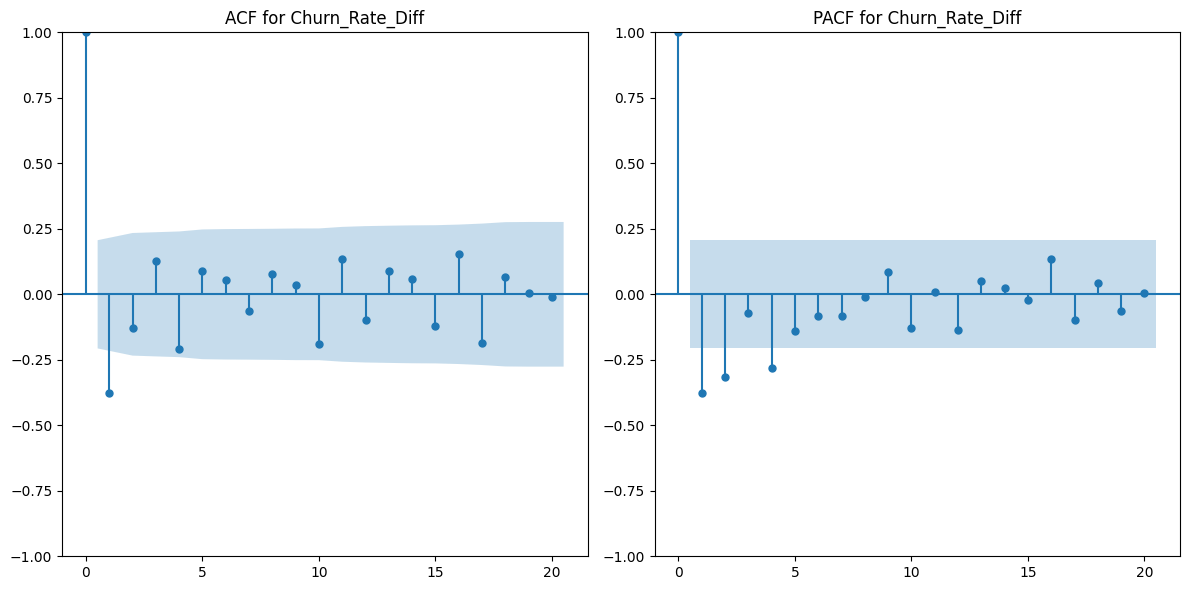

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for Churn_Rate_Diff
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(df['Churn_Rate_Diff'].dropna(), ax=plt.gca(), lags=20)
plt.title("ACF for Churn_Rate_Diff")
plt.subplot(1, 2, 2)
plot_pacf(df['Churn_Rate_Diff'].dropna(), ax=plt.gca(), lags=20)
plt.title("PACF for Churn_Rate_Diff")
plt.tight_layout()
plt.show()

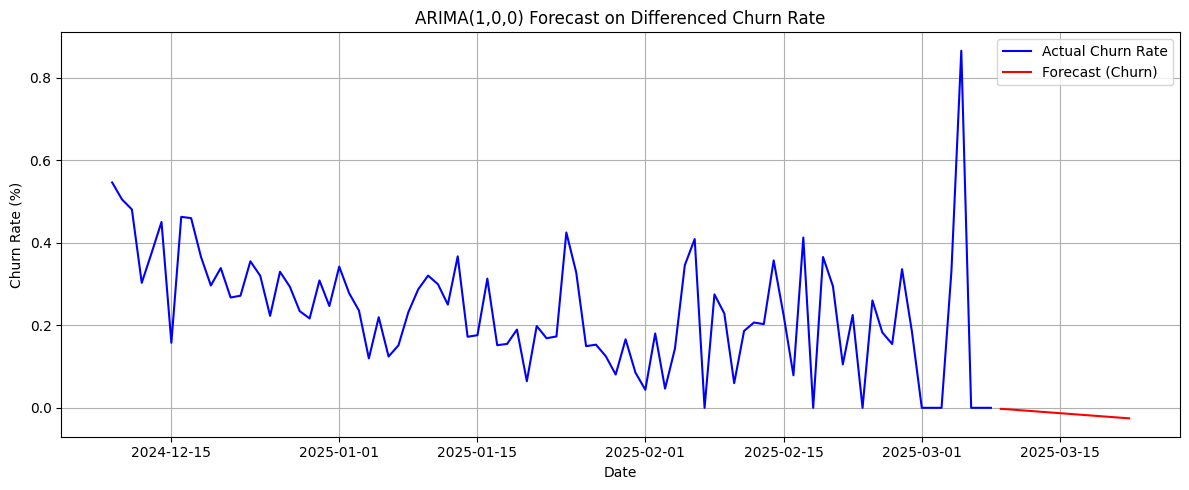

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Churn Rate Diff Forecast (ARIMA(1,0,1)): 2025-03-09    0.126152
2025-03-10    0.005002
2025-03-11   -0.001716
2025-03-12   -0.002088
2025-03-13   -0.002109
2025-03-14   -0.002110
2025-03-15   -0.002110
2025-03-16   -0.002110
2025-03-17   -0.002110
2025-03-18   -0.002110
2025-03-19   -0.002110
2025-03-20   -0.002110
2025-03-21   -0.002110
2025-03-22   -0.002110
Freq: D, Name: predicted_mean, dtype: float64


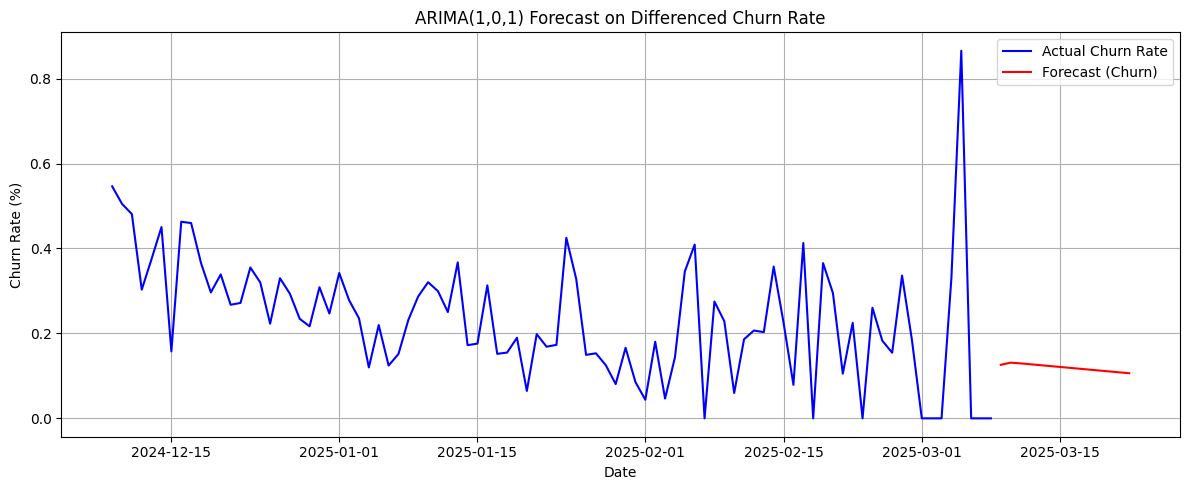

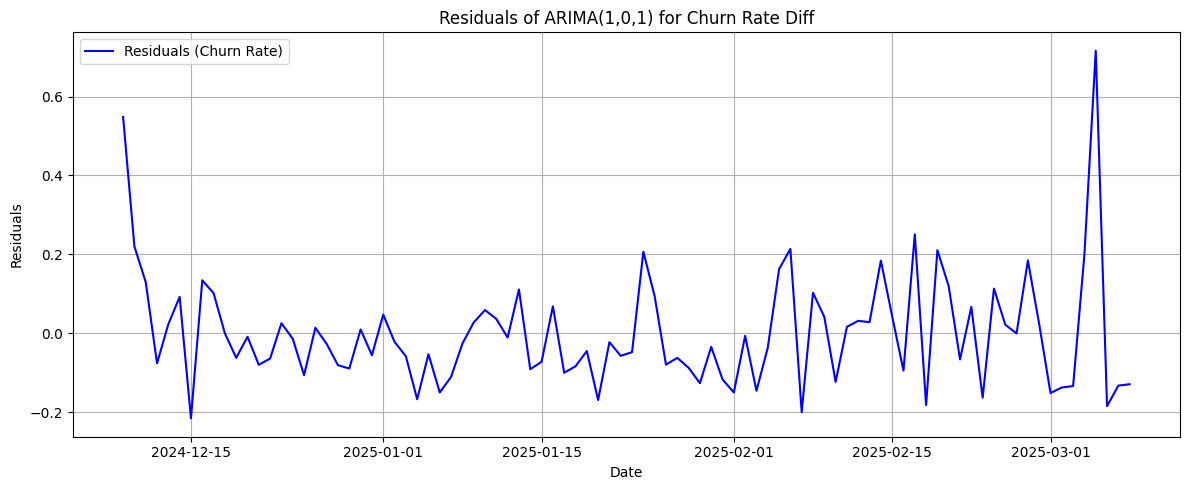

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
df = pd.read_csv("churn.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Differencing for Churn_Rate
df['Churn_Rate_Diff'] = df['Churn_Rate'].diff()
df = df.dropna()

# --- ARIMA(1,0,0) with Provided Forecasts ---
forecast_churn_diff_100 = pd.Series([
    -0.002518, -0.001484, -0.001909, -0.001734, -0.001806,
    -0.001776, -0.001788, -0.001783, -0.001785, -0.001785,
    -0.001785, -0.001785, -0.001785, -0.001785
], index=pd.date_range('2025-03-09', periods=14, freq='D'))

# Convert differenced forecasts to original scale for ARIMA(1,0,0)
last_churn = df['Churn_Rate'].iloc[-1]  # 0
forecast_churn_100 = [last_churn + sum(forecast_churn_diff_100[:i+1]) for i in range(14)]

# Plotting for ARIMA(1,0,0)
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=14)
plt.figure(figsize=(12, 5))
plt.plot(df['Churn_Rate'], label='Actual Churn Rate', color='blue')
plt.plot(future_dates, forecast_churn_100, label='Forecast (Churn)', color='red')
plt.title("ARIMA(1,0,0) Forecast on Differenced Churn Rate")
plt.xlabel("Date")
plt.ylabel("Churn Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ARIMA(1,0,1) for Churn_Rate_Diff
model_churn = ARIMA(df['Churn_Rate_Diff'], order=(1, 0, 1))
model_churn_fit = model_churn.fit()
forecast_churn_diff_101 = model_churn_fit.forecast(steps=14)
print("Churn Rate Diff Forecast (ARIMA(1,0,1)):", forecast_churn_diff_101)

# Convert differenced forecasts to original scale for ARIMA(1,0,1)
forecast_churn_101 = [last_churn + sum(forecast_churn_diff_101[:i+1]) for i in range(14)]

# Plot ARIMA(1,0,1) forecast
plt.figure(figsize=(12, 5))
plt.plot(df['Churn_Rate'], label='Actual Churn Rate', color='blue')
plt.plot(future_dates, forecast_churn_101, label='Forecast (Churn)', color='red')
plt.title("ARIMA(1,0,1) Forecast on Differenced Churn Rate")
plt.xlabel("Date")
plt.ylabel("Churn Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot residuals for ARIMA(1,0,1)
plt.figure(figsize=(12, 5))
plt.plot(model_churn_fit.resid, label='Residuals (Churn Rate)', color='blue')
plt.title("Residuals of ARIMA(1,0,1) for Churn Rate Diff")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
!pip install tensorflow scikit-learn numpy pandas matplotlib

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("churn.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Normalize data
scaler_total = MinMaxScaler(feature_range=(0, 1))
scaler_churn = MinMaxScaler(feature_range=(0, 1))
total_scaled = scaler_total.fit_transform(df[['Total_Watch_Hours']])
churn_scaled = scaler_churn.fit_transform(df[['Churn_Rate']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7  # Use 7 days to predict the next day
X_total, y_total = create_sequences(total_scaled, seq_length)
X_churn, y_churn = create_sequences(churn_scaled, seq_length)

# Train/test split
train_size = int(len(X_total) * 0.8)
X_train_total, X_test_total = X_total[:train_size], X_total[train_size:]
y_train_total, y_test_total = y_total[:train_size], y_total[train_size:]
X_train_churn, X_test_churn = X_churn[:train_size], X_churn[train_size:]
y_train_churn, y_test_churn = y_churn[:train_size], y_churn[train_size:]

print("X_train_total shape:", X_train_total.shape)
print("X_test_total shape:", X_test_total.shape)

X_train_total shape: (67, 7, 1)
X_test_total shape: (17, 7, 1)


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Build LSTM model for Churn_Rate
model_churn = Sequential([
    Input(shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
model_churn.compile(optimizer='adam', loss='mse')

# Re-train model (optional, if you want to re-run)
history_churn = model_churn.fit(X_train_churn, y_train_churn, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - loss: 0.0863 - val_loss: 0.0930
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0724 - val_loss: 0.0823
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0599 - val_loss: 0.0724
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0531 - val_loss: 0.0630
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0465 - val_loss: 0.0539
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0319 - val_loss: 0.0456
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0265 - val_loss: 0.0382
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0199 - val_loss: 0.0326
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0138 - val_loss: 0.0297
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - val_loss: 0.0295
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0151 - val_loss: 0.0299
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0143 - val_loss: 0.0298


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Predict on test set using LSTM for Churn_Rate
y_pred_churn = model_churn.predict(X_test_churn)

# Inverse transform predictions to original scale
y_test_churn_inv = scaler_churn.inverse_transform(y_test_churn.reshape(-1, 1))
y_pred_churn_inv = scaler_churn.inverse_transform(y_pred_churn)

# Calculate metrics for LSTM
rmse_churn = np.sqrt(mean_squared_error(y_test_churn_inv, y_pred_churn_inv))
mae_churn = mean_absolute_error(y_test_churn_inv, y_pred_churn_inv)

print("LSTM - Churn Rate: RMSE =", rmse_churn, "MAE =", mae_churn)

# Compare with ARIMA
# Adjust indices to match LSTM test set (accounting for seq_length)
train_data_churn = df['Churn_Rate'][:train_size + seq_length]  # Include seq_length offset
test_data_churn = df['Churn_Rate'][train_size + seq_length:]   # Align test set
model_arima_churn = ARIMA(train_data_churn, order=(1, 0, 1)).fit()
arima_pred_churn = model_arima_churn.forecast(steps=len(test_data_churn))
mae_arima_churn = mean_absolute_error(test_data_churn, arima_pred_churn)
print("ARIMA(1,0,1) - Churn Rate MAE =", mae_arima_churn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
LSTM - Churn Rate: RMSE = 0.22120617940699655 MAE = 0.1629293279148446
ARIMA(1,0,1) - Churn Rate MAE = 0.17011644926247607


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0989 - val_loss: 0.0933
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0713 - val_loss: 0.0761
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0523 - val_loss: 0.0602
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0361 - val_loss: 0.0461
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0271 - val_loss: 0.0353
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0154 - val_loss: 0.0298
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0151 - val_loss: 0.0299
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0135 - val_loss: 0.0306
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0163 - val_loss: 0.0298
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0140 - val_loss: 0.0298
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0119 - val_loss: 0.0306
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0148 - val_loss: 0.0312


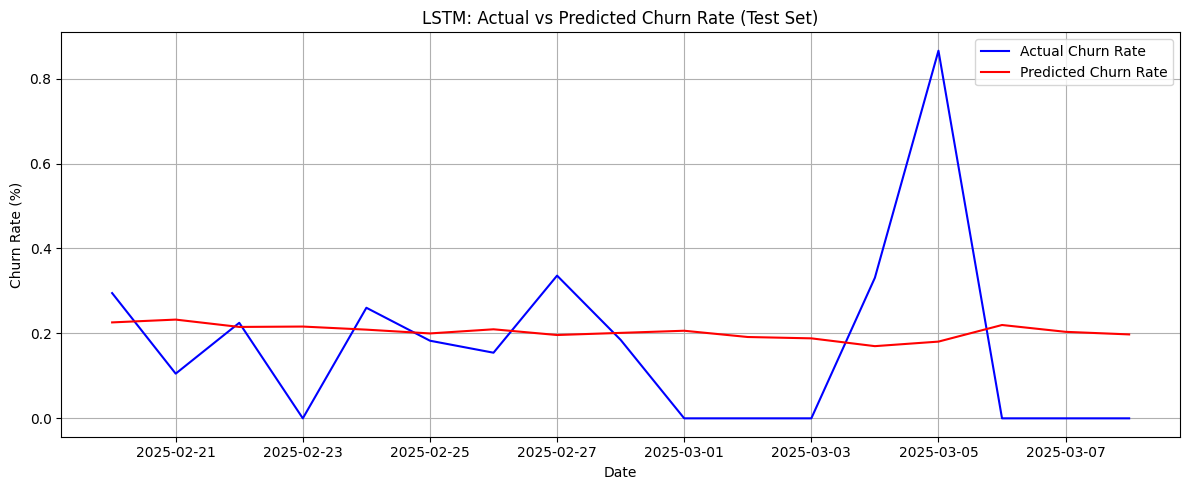

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input as KerasInput
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("churn.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index = pd.date_range(start=df.index[0], end=df.index[-1], freq='D')  # Set frequency to 'D'

# Normalize data (Churn_Rate only)
scaler_churn = MinMaxScaler(feature_range=(0, 1))
churn_scaled = scaler_churn.fit_transform(df[['Churn_Rate']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X_churn, y_churn = create_sequences(churn_scaled, seq_length)

# Train/test split (80/20)
train_size = int(len(X_churn) * 0.8)
X_train_churn, X_test_churn = X_churn[:train_size], X_churn[train_size:]
y_train_churn, y_test_churn = y_churn[:train_size], y_churn[train_size:]

# Re-train LSTM model for Churn_Rate
model_churn = Sequential([
    KerasInput(shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
model_churn.compile(optimizer='adam', loss='mse')
history_churn = model_churn.fit(X_train_churn, y_train_churn, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Predict on test set
y_pred_churn = model_churn.predict(X_test_churn)

# Inverse transform predictions to original scale
y_test_churn_inv = scaler_churn.inverse_transform(y_test_churn.reshape(-1, 1))
y_pred_churn_inv = scaler_churn.inverse_transform(y_pred_churn)

# Plot Actual vs Predicted on Test Set (with dates)
plt.figure(figsize=(12, 5))
plt.plot(df.index[train_size + seq_length:], y_test_churn_inv, label='Actual Churn Rate', color='blue')
plt.plot(df.index[train_size + seq_length:], y_pred_churn_inv, label='Predicted Churn Rate', color='red')
plt.title("LSTM: Actual vs Predicted Churn Rate (Test Set)")
plt.xlabel("Date")
plt.ylabel("Churn Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - loss: 0.0809 - val_loss: 0.0875
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0759 - val_loss: 0.0741
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0496 - val_loss: 0.0621
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0427 - val_loss: 0.0510
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0272 - val_loss: 0.0413
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0216 - val_loss: 0.0338
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0141 - val_loss: 0.0301
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0119 - val_loss: 0.0298
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0130 - val_loss: 0.0302
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0154 - val_loss: 0.0300
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - val_loss: 0.0299
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0146 - val_loss: 0.0304


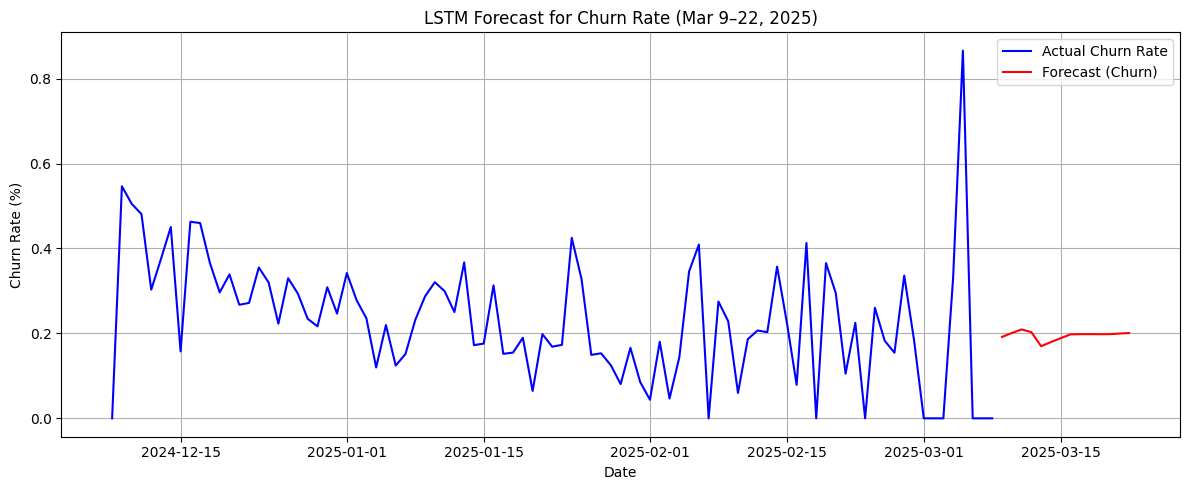

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input as KerasInput
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("churn.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index = pd.date_range(start=df.index[0], end=df.index[-1], freq='D')  # Set frequency to 'D'

# Normalize data (Churn_Rate only)
scaler_churn = MinMaxScaler(feature_range=(0, 1))
churn_scaled = scaler_churn.fit_transform(df[['Churn_Rate']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X_churn, y_churn = create_sequences(churn_scaled, seq_length)

# Train/test split (80/20)
train_size = int(len(X_churn) * 0.8)
X_train_churn, X_test_churn = X_churn[:train_size], X_churn[train_size:]
y_train_churn, y_test_churn = y_churn[:train_size], y_churn[train_size:]

# Re-train LSTM model for Churn_Rate
model_churn = Sequential([
    KerasInput(shape=(seq_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
model_churn.compile(optimizer='adam', loss='mse')
history_churn = model_churn.fit(X_train_churn, y_train_churn, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Step 5: Forecast Future Days (Mar 9–22, 2025)
last_sequence_churn = churn_scaled[-seq_length:]
future_predictions_churn = []

# Rolling forecast
current_sequence_churn = last_sequence_churn.copy()
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=14)
for _ in range(14):
    x_churn = current_sequence_churn.reshape((1, seq_length, 1))
    next_pred_churn = model_churn.predict(x_churn)
    future_predictions_churn.append(next_pred_churn[0, 0])
    current_sequence_churn = np.roll(current_sequence_churn, -1)
    current_sequence_churn[-1] = next_pred_churn[0, 0]

# Inverse transform
future_churn_inv = scaler_churn.inverse_transform(np.array(future_predictions_churn).reshape(-1, 1))
future_churn_inv = [max(0, x[0]) for x in future_churn_inv]

# Print forecast values
print("\nFuture Forecast for Churn Rate (Mar 9–22, 2025):")
for date, value in zip(future_dates, future_churn_inv):
    print(f"{date.date()}: {value:.4f}")

# Plot historical data with forecast
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Churn_Rate'], label='Actual Churn Rate', color='blue')
plt.plot(future_dates, future_churn_inv, label='Forecast (Churn)', color='red')
plt.title("LSTM Forecast for Churn Rate (Mar 9–22, 2025)")
plt.xlabel("Date")
plt.ylabel("Churn Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

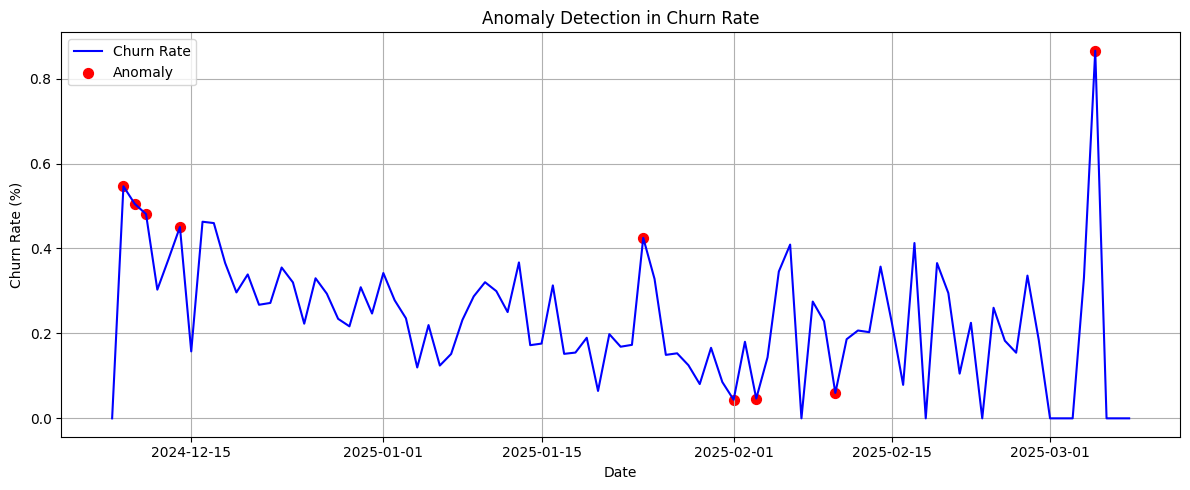

Detected Anomalies in Churn Rate:
Date: 2024-12-09, Churn Rate: 0.5465%
Date: 2024-12-10, Churn Rate: 0.5052%
Date: 2024-12-11, Churn Rate: 0.4810%
Date: 2024-12-14, Churn Rate: 0.4506%
Date: 2025-01-24, Churn Rate: 0.4251%
Date: 2025-02-01, Churn Rate: 0.0438%
Date: 2025-02-03, Churn Rate: 0.0466%
Date: 2025-02-10, Churn Rate: 0.0598%
Date: 2025-03-05, Churn Rate: 0.8658%


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load dataset
df = pd.read_csv("churn.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index = pd.date_range(start=df.index[0], end=df.index[-1], freq='D')  # Set frequency to 'D'

# Anomaly detection on Churn_Rate using IsolationForest
iso = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly'] = iso.fit_predict(df[['Churn_Rate']])  # Predict anomalies (-1 for anomaly, 1 for normal)

# Convert anomaly labels: -1 (anomaly) to 1, 1 (normal) to 0 for plotting
df['Anomaly'] = df['Anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Plot Churn_Rate with anomalies highlighted
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Churn_Rate'], label='Churn Rate', color='blue')
plt.scatter(df.index[df['Anomaly'] == 1], df['Churn_Rate'][df['Anomaly'] == 1], color='red', label='Anomaly', s=50)
plt.title("Anomaly Detection in Churn Rate")
plt.xlabel("Date")
plt.ylabel("Churn Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print detected anomalies for reference
print("Detected Anomalies in Churn Rate:")
anomaly_dates = df.index[df['Anomaly'] == 1]
anomaly_values = df['Churn_Rate'][df['Anomaly'] == 1]
for date, value in zip(anomaly_dates, anomaly_values):
    print(f"Date: {date.date()}, Churn Rate: {value:.4f}%")